In [1]:
import pandas as pd

from bengrn import get_GT_db, get_perturb_gt, get_sroy_gt, BenGRN, FILEDIR

import numpy as np
import tqdm

%load_ext autoreload
%autoreload 2


💡 connected lamindb: jkobject/scprint


In [2]:
omni = get_GT_db('omnipath')

In [3]:
varnames = set(omni.iloc[:, :2].values.flatten())
varnames = list(varnames)

In [6]:
da = np.zeros((len(varnames), len(varnames)), dtype=float)
for i, j in tqdm.tqdm(omni.iloc[:, :2].values):
    if i in varnames and j in varnames:
        da[varnames.index(i), varnames.index(j)] = 1

100%|██████████| 278579/278579 [02:45<00:00, 1678.46it/s]


In [ ]:
da.sum()

230678.0

In [ ]:
da.sum(1).mean()

12.161429776465626

In [ ]:
(da.sum(0)> 1000).sum()

0

In [ ]:
(da.sum(0)> 100).sum()

550

In [ ]:
(da.sum(0)> 10).sum()

4430

In [ ]:
(da.sum(1)> 1000).sum()

15

In [ ]:
(da.sum(1)> 100).sum()

436

In [ ]:
(da.sum(1)> 10).sum()

2255

In [ ]:
da.sum(0)>0

(18968, 18968)

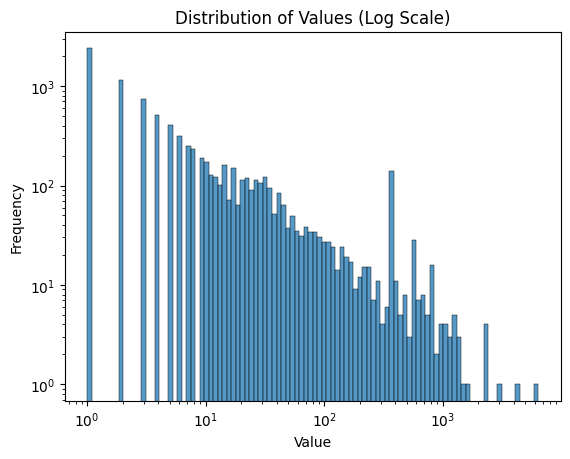

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

values = da.sum(1)
sns.histplot(values, bins=100, log_scale=(True, False), fill=True)
plt.title('Distribution of Values (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


In [ ]:
df = pd.read_csv(
                FILEDIR + "/../data/GroundTruth/stone_and_sroy/hESC_ground_truth.tsv",
                sep="\t",
                header=None,
            )

In [ ]:
omnilist = set((i,j) for i,j in omni.iloc[:,0:2].values)

In [ ]:
df

,0,1
0,ATF3,ABHD3
1,ATF3,AP3M2
2,ATF3,APBB3
3,ATF3,ARHGAP8
4,ATF3,ARHGEF3
...,...,...
12981,ZNF281,TMEM2
12982,ZNF281,UCHL1
12983,ZNF281,UPP1
12984,ZNF281,WSB2


In [ ]:
sroylist = set((i,j) for i,j in df.values)

In [ ]:
sroylist_t = set((j,i) for i,j in df.values)

In [ ]:
len(sroylist), len(omnilist), len(sroylist & omnilist), len(omnilist - sroylist)

(12986, 273556, 388, 273168)

In [ ]:
len(sroylist_t & omnilist), len(omnilist - sroylist_t)

(112, 273444)

In [ ]:
len(sroylist_t & sroylist)

37

In [ ]:
omni

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,n_sources,n_primary_sources,n_references,references_stripped
0,CALM1,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3.0,11290752;11983166;12601176
1,CALM3,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3.0,11290752;11983166;12601176
2,CALM2,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,1,1,3.0,11290752;11983166;12601176
3,CAV1,TRPC1,True,True,False,True,True,False,13,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,post_translational,5,5,8.0,10980191;12732636;14551243;16822931;18430726;1...
4,DRD2,TRPC1,True,True,False,True,True,False,1,TRIP:18261457,TRIP,post_translational,1,1,1.0,18261457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278574,TAF7,MIMAT0000075,True,False,False,False,False,False,0,None,ENCODE_tf-mirna,mirna_transcriptional,1,0,NaN,None
278575,RAD21,MIMAT0005867,True,False,False,False,False,False,0,None,ENCODE_tf-mirna,mirna_transcriptional,1,0,NaN,None
278576,P23511,MIMAT0003308,True,False,False,False,False,False,0,None,ENCODE_tf-mirna,mirna_transcriptional,1,0,NaN,None
278577,FOSL2,MIMAT0005867,True,False,False,False,False,False,0,None,ENCODE_tf-mirna,mirna_transcriptional,1,0,NaN,None


In [8]:
#SROY
sroy = get_sroy_gt(get="han")
sroy.var['symbol'] = sroy.var.index
#GWPS
gwps = get_perturb_gt('gwps')
gwps.var['symbol'] = gwps.var.gene_name

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:544: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sc.obs["organism_ontology_term_id"] = "NCBITaxon:9606"


In [16]:
(values==0).sum()

3033

/local/scratch/tmp/ipykernel_1222996/4088921595.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 2000)


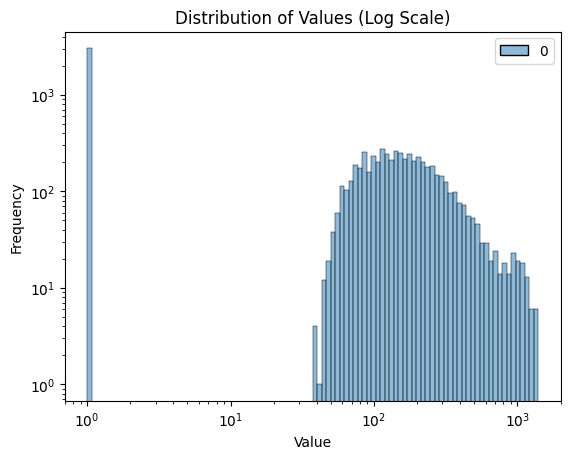

In [41]:
values = gwps.varp['GRN'].sum(1)+1
sns.histplot(values, bins=100, log_scale=(True, False), fill=True)
plt.title('Distribution of Values (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.yscale('log')
plt.show()

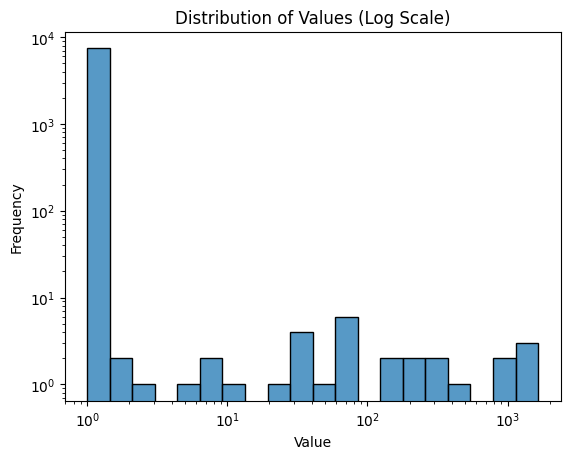

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

values = sroy.varp['GRN'].sum(1)+1
sns.histplot(values, bins=20, log_scale=(True, False))
plt.title('Distribution of Values (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# SROY

loading GT,  omnipath
intersection of 5421 genes
intersection pct: 0.7261888814467515
precision:  0.05196431366411019 
recall:  0.007354732947874438 
random precision: 0.0015363581970075373


 99%|█████████▉| 127/128 [00:11<00:00, 12.24it/s]/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:11<00:00, 11.42it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0017161505176658254
EPR: 4.961930966011397


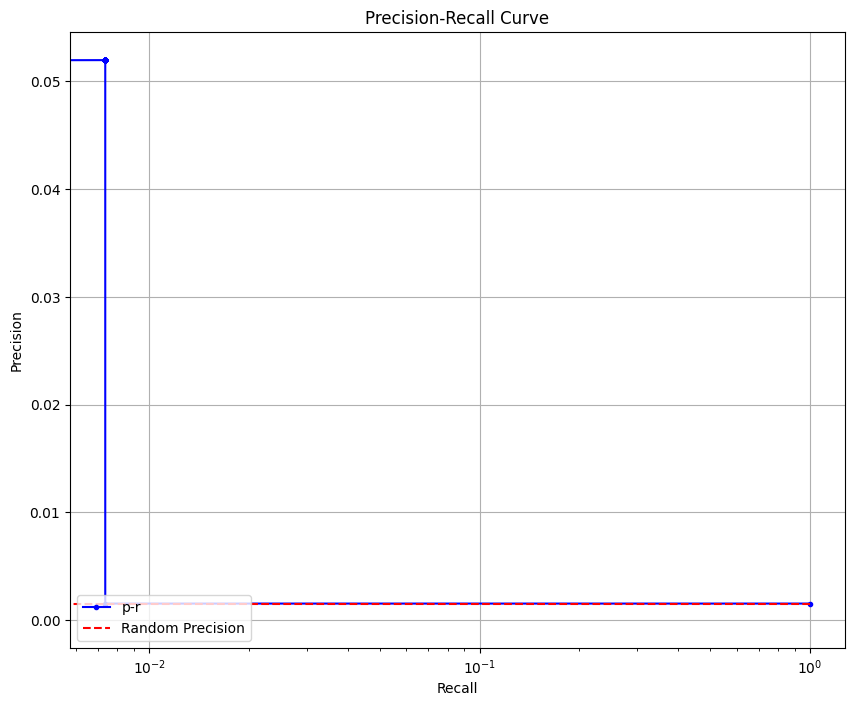

{'precision': 0.05196431366411019,
 'recall': 0.007354732947874438,
 'rand_precision': 0.0015363581970075373,
 'auprc': 0.0017161505176658254,
 'epr': 4.961930966011397}

In [ ]:
#SROY
#OMNIPATH
BenGRN(sroy).compare_to(to="omnipath")

In [ ]:
(sroy.varp['GRN'].sum(1)>0).sum()

31

loading GT,  omnipath
intersection of 5421 genes
intersection pct: 0.7261888814467515
precision:  0.015495382688996712 
recall:  0.0021931281983119558 
random precision: 0.0015363581970075373


 98%|█████████▊| 126/128 [00:10<00:00, 11.13it/s]/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:10<00:00, 12.23it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0015499804468824092
EPR: 1.5309086549993332


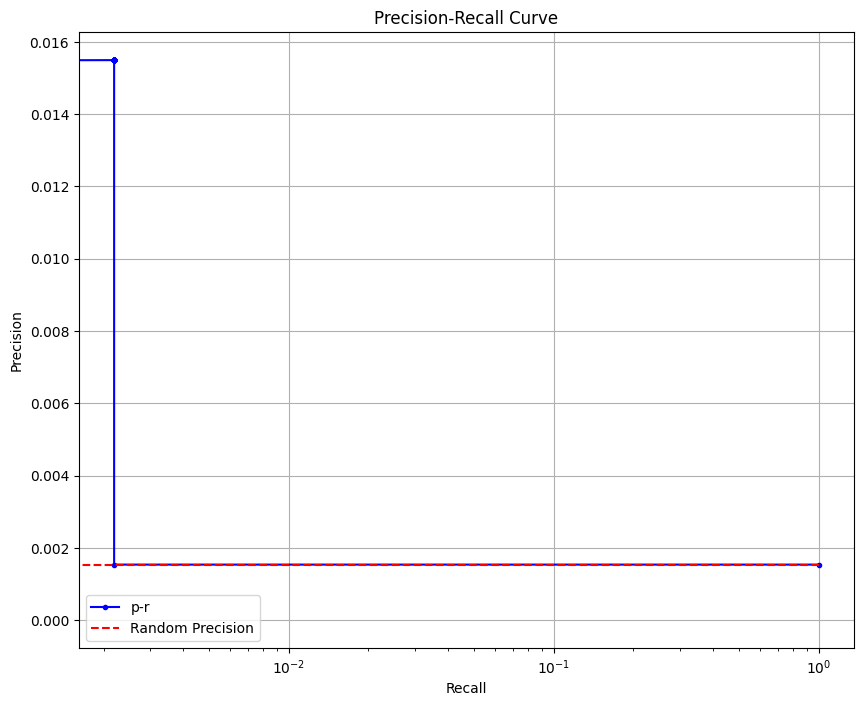

{'precision': 0.015495382688996712,
 'recall': 0.0021931281983119558,
 'rand_precision': 0.0015363581970075373,
 'auprc': 0.0015499804468824092,
 'epr': 1.5309086549993332}

In [ ]:
sroy.varp['GRN'] = sroy.varp['GRN'].T
BenGRN(sroy).compare_to(to="omnipath")

In [ ]:
(sroy.varp['GRN'].sum(1)>0).sum()

4141

# GWPS

In [ ]:
gwps.var['ensembl_id'] = gwps.var.index
gwps.var.index = gwps.var.gene_name.astype(str)

In [ ]:
(gwps.varp['GRN'].sum(1)>0).sum(), (gwps.varp['GRN'].sum(0)>0).sum()

(5530, 6384)

loading GT,  omnipath
intersection of 5727 genes
intersection pct: 0.6688076608665188
precision:  0.001522780666789853 
recall:  0.021875148125325875 
random precision: 0.0012862355421199006
EPR: 1.2537787690006579


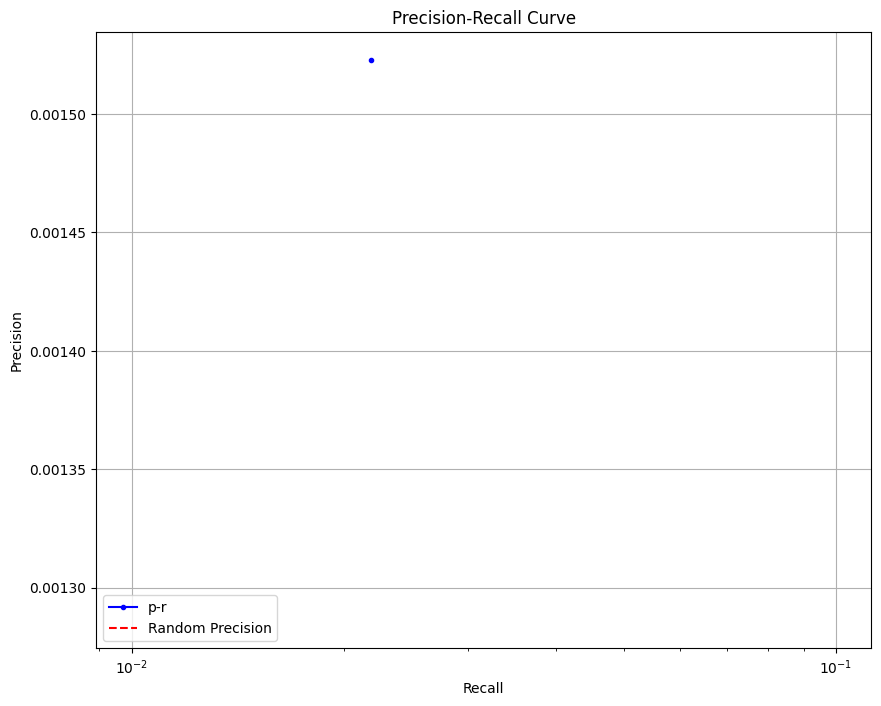

{'precision': 0.001522780666789853,
 'recall': 0.021875148125325875,
 'rand_precision': 0.0012862355421199006,
 'epr': 1.2537787690006579}

In [ ]:
BenGRN(gwps, do_auc=False).compare_to(to="omnipath")

loading GT,  omnipath
intersection of 5727 genes
intersection pct: 0.6688076608665188
precision:  0.0029630705065596705 
recall:  0.042565293643646016 
random precision: 0.0012862355421199006
EPR: 0.6443167919241747


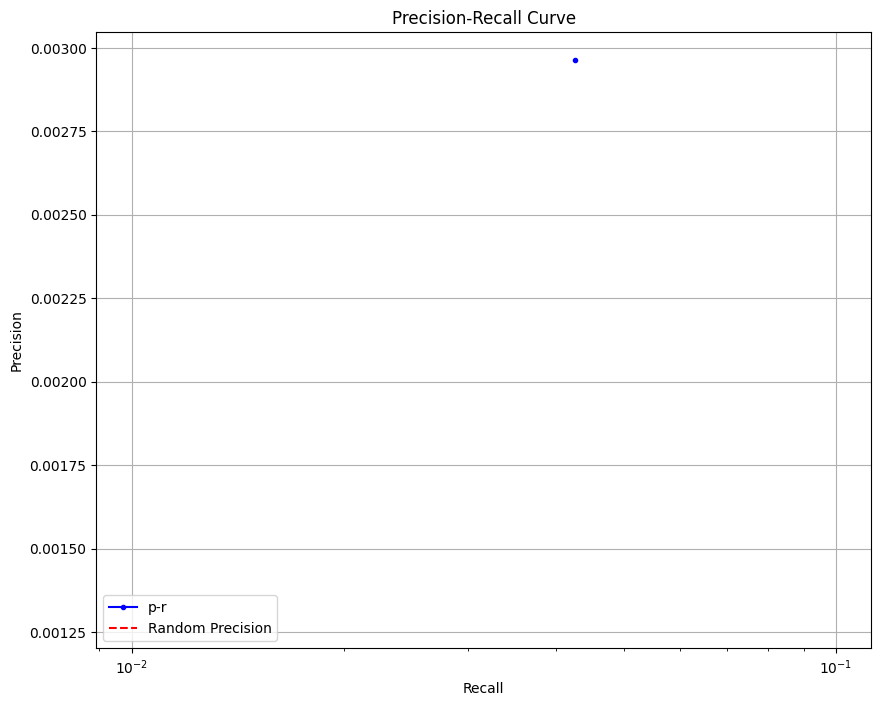

{'precision': 0.0029630705065596705,
 'recall': 0.042565293643646016,
 'rand_precision': 0.0012862355421199006,
 'epr': 0.6443167919241747}

In [ ]:
gwps.varp['GRN'] = gwps.varp['GRN'].T
BenGRN(gwps, do_auc=False).compare_to(to="omnipath")

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


precision:  0.01108829568788501 
recall:  0.020785219399538105 
random precision: 0.00979697115964764


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1061.81it/s]

Area Under Precision-Recall Curve (AUPRC):  0.010340817326264214
EPR: 0.7824397043431892


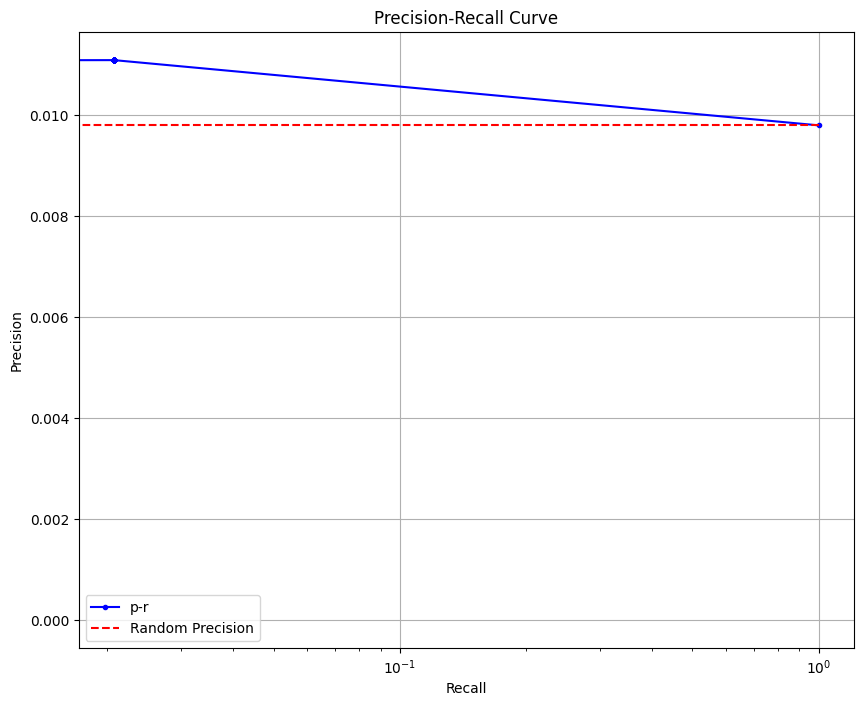

{'precision': 0.01108829568788501,
 'recall': 0.020785219399538105,
 'rand_precision': 0.00979697115964764,
 'auprc': 0.010340817326264214,
 'EPR': 0.7824397043431892}

In [ ]:
#SROY
#GWPS
BenGRN(gwps).compare_to(sroy)